# Exercise 5 - BLOB Analysis (connected component analysis and object classification)
  BLOBS=REGIONES

In [1]:
from skimage import io, color, morphology
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu
from skimage import segmentation
from skimage import measure
from skimage.color import label2rgb

Ejercicios para ver los connected component analysis methods o tmb llamados ;  BLOB (binary large object) analysis.

funcion para plotear imagen


In [3]:
def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified)
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()

## LEGO Classification

Tecnicas de BLOB 


### Exercise 1: Binary image from original image

saca la imagen binaria en gray scale despues de hacerle un threshold otsu 

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


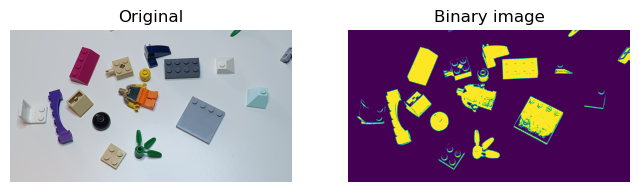

In [12]:
in_dir = 'data/'
im_org = io.imread(f'{in_dir}lego_4_small.png')
im_gray = color.rgb2gray(im_org) # a grises
thres = threshold_otsu(im_gray) # guardamos el threshold
#print(thres)
#y lo aplicamos 
im_bin = im_gray < thres  # valores menores que thresh son true
print(im_bin)
show_comparison(im_org, im_bin, 'Binary image')

### Exercise 2: Remove border BLOBs

Use segmentation.clear_border to remove border pixels from the binary image.


In [14]:
im_process = segmentation.clear_border(im_bin) # elimina los pixeles encontacto con el borde 
print(im_process)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


### Exercise 3: Cleaning using morphological operations
para reducir ruido, cerrar holes haces un closing, con un opening y un shaped de radius 5

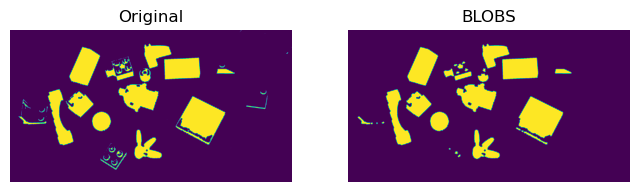

In [22]:
footprint = morphology.disk(5) # creas el disco (matriz de radio 5 con 1 el circulo y 0 fuera)
#print(footprint)
im_process1 = morphology.binary_closing(im_process, footprint) # cierre
#print(im_process) 
im_open = morphology.binary_opening(im_process1, footprint)  # abrimos


# ejemplo pa qeu veas como se quedan los objetos depues de la paranoia esta
show_comparison(im_process, im_open, 'BLOBS')

### Exercise 4: Find labels

The actual connected component analysis / BLOB analysis is performed using measure.label :




In [25]:
# meausre lalebs dara una etiqeuta para cada valor que este en una region de esa matrz de 1 y 0
# por ejemplo para cada pieza dará 1 a una regon, 2 a otra... etc
label_img = measure.label(im_open) 
n_labels = label_img.max() # esto da el valor más alto de la matriz pero con este numero ya se sabe 
                           # cuantos objetos habrá o labels o regiones(lo mismo).
print(f"Number of labels: {n_labels}")

Number of labels: 29


### Exercise 5 Visualize found labels

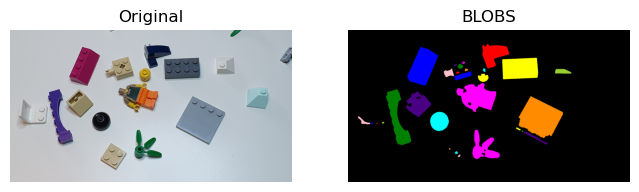

In [27]:
# esto asigna un color unico a cada region
im_blob = label2rgb(label_img)
show_comparison(im_org, im_blob, 'BLOBS')

### Exercise 6 Compute BLOB features
It is possible to compute a wide variety of BLOB features using the measure.regionprops function:

Calculo de cosas como el area para  CADA REGION

[<skimage.measure._regionprops.RegionProperties object at 0x00000184CF0D7FE0>, <skimage.measure._regionprops.RegionProperties object at 0x00000184D0890F80>, <skimage.measure._regionprops.RegionProperties object at 0x00000184D09CB950>, <skimage.measure._regionprops.RegionProperties object at 0x00000184CEC1C890>, <skimage.measure._regionprops.RegionProperties object at 0x00000184D091D490>, <skimage.measure._regionprops.RegionProperties object at 0x00000184D0A4D4C0>, <skimage.measure._regionprops.RegionProperties object at 0x00000184D0A4F3E0>, <skimage.measure._regionprops.RegionProperties object at 0x00000184CEE63080>, <skimage.measure._regionprops.RegionProperties object at 0x00000184CEE62480>, <skimage.measure._regionprops.RegionProperties object at 0x00000184CEDA6150>, <skimage.measure._regionprops.RegionProperties object at 0x00000184CEE4B950>, <skimage.measure._regionprops.RegionProperties object at 0x00000184CEE48F50>, <skimage.measure._regionprops.RegionProperties object at 0x0000

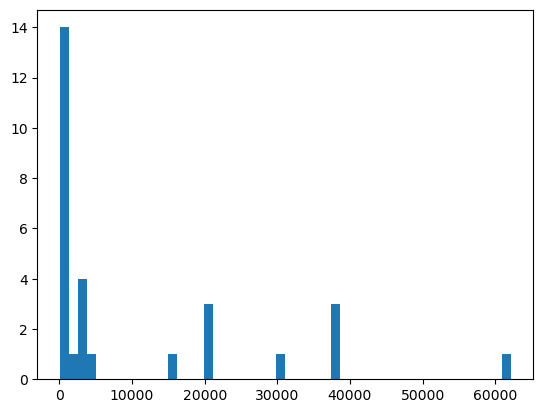

In [ ]:
region_props = measure.regionprops(label_img) # esto devuelve una lista con info de la img etiqeutada que le pasas
# como la media PARA CADA REGION
print(region_props)
areas = np.array([prop.area for prop in region_props]) # extrae los areas para cada region dentro del vector de caracteristicas de arriba y las mete al array nuevo
print(areas)

plt.hist(areas, bins=50)
plt.show()

* x muestra el valor del area

Los valores más pequeños del eje X corresponden a las regiones más pequeñas (menos píxeles).
Los valores más grandes en el eje X corresponden a las regiones más grandes (más píxeles).
* y muestra el numero de regiones dentro de esos valores de area . Es decir cuantas regiones tienen entre 3k y 4k de area.

Un valor alto en el eje Y significa que hay muchas regiones de un cierto tamaño (por ejemplo, muchas regiones pequeñas).
Un valor bajo en el eje Y significa que hay pocas regiones en ese tamaño específico.

Si tienes una imagen con varias regiones etiquetadas, este histograma te dará una idea de cuántas de esas regiones tienen tamaños pequeños, medianos o grandes. Por ejemplo, si la mayoría de las áreas están agrupadas en el lado izquierdo del histograma, eso indica que la mayoría de las regiones son pequeñas.

### Exercise 7: Exploring BLOB features


In [34]:
!python Ex5-BlobAnalysisInteractive.py

esto se te abre; 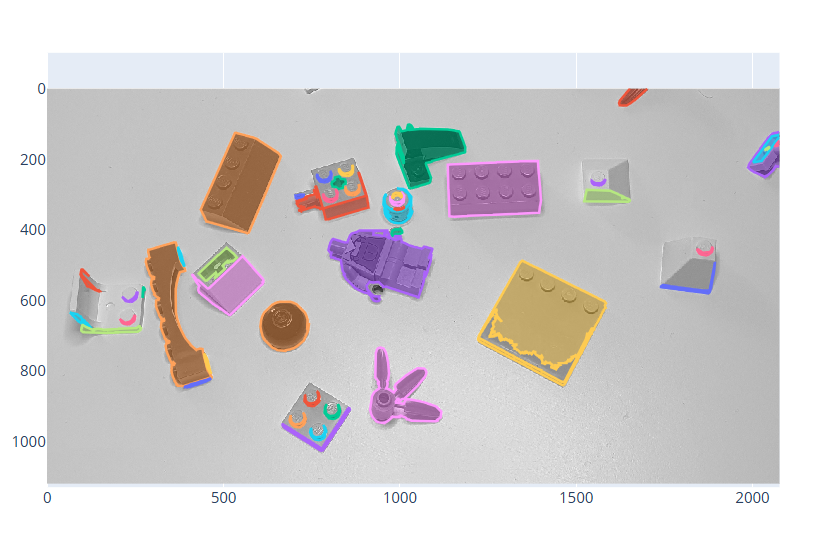

## Cell counting

The goal of this part of the exercise, is to create a small program that can automatically count the number of cell nuclei in an image.

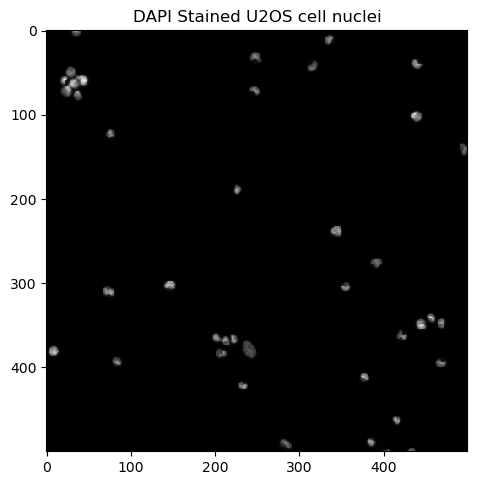

In [ ]:
in_dir = "data/"
img_org = io.imread(in_dir + 'Sample E2 - U2OS DAPI channel.tiff') # esta foto es enorme por eso la trozeamos
# slice to extract smaller image
img_small = img_org[700:1200, 900:1400]
img_gray = img_as_ubyte(img_small)  # la pasamos a formato de 0 a 255, 8 bits

io.imshow(img_gray, vmin=0, vmax=150)
plt.title('DAPI Stained U2OS cell nuclei')
io.show()

Initially, we would like to apply a threshold to create a binary image where nuclei are foreground. To select a good threshold, inspect the histogram:

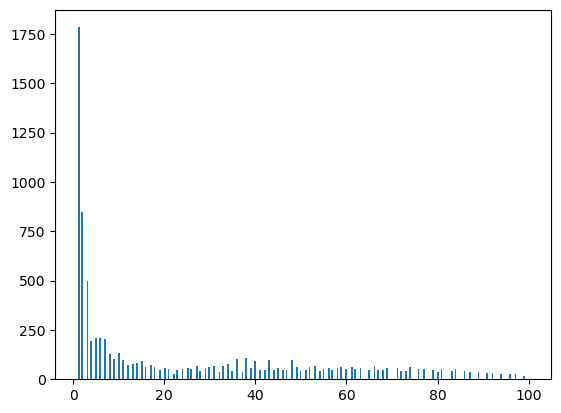

In [ ]:
# avoid bin with value 0 due to the very large number of background pixels
plt.hist(img_gray.ravel(), bins=256, range=(1, 100))  # si pones 0 saldran muchos por el fondo y queda mal
io.show()

### Exercise 8: Threshold selection

Select an appropriate threshold, that seperates nuclei from the background. You can set it manually or use Otsus method.


30


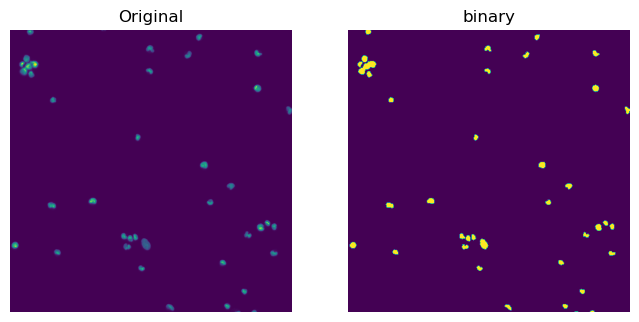

In [41]:
thres = threshold_otsu(img_gray)
img_bin = img_gray > thres
print(thres)
show_comparison(img_gray, img_bin, 'binary')

###  Exercise 9: Remove border BLOBS

PAra separar nucleos qeu estan pegados y demas se hace limpieza de bordes


In [42]:
img_c_b = segmentation.clear_border(img_bin)

Codigo de clasificacion y labeling

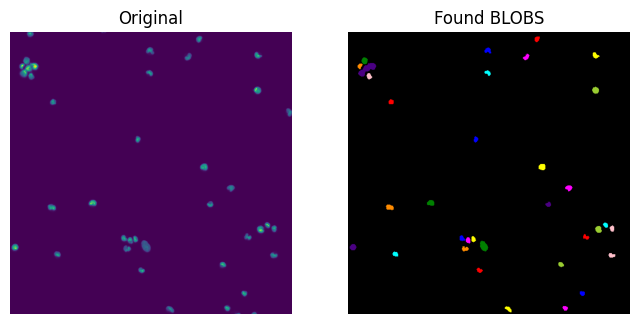

In [15]:
label_img = measure.label(img_c_b)
image_label_overlay = label2rgb(label_img)
show_comparison(img_gray, image_label_overlay, 'Found BLOBS')

### Exercise 10: BLOB features
The task is now to find some object features that identify the cell nuclei and let us remove noise and connected nuclei. We use the function regionprops to compute a set of features for each object

In [ ]:
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props]) # sacamos el area

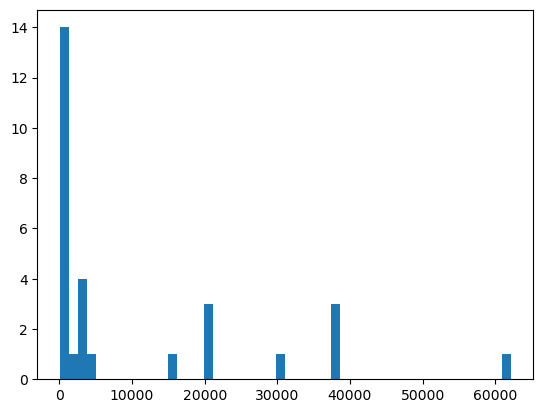

In [45]:
plt.hist(areas, bins=50)  # vemos los areas 
plt.show()       # un dato curiosos es que las regiones las defines tu con ese 50
                    # si pones más pues se agruparan mas dentro de esa region

se puede sacar del histograma que ; 
* Áreas pequeñas: Pueden indicar ruido, y el histograma te ayudará a identificar un umbral para eliminarlas.
- Áreas grandes: Pueden indicar objetos solapados o varios objetos conectados, y el histograma te ayudará a identificarlos y considerar técnicas para separarlos.
- Ajustar los bins: Cambiar el número de intervalos en el histograma puede ayudarte a obtener una visión más clara de la distribución de áreas y facilitar el ajuste de los umbrales de filtrado.


### Exercise 11: BLOB classification by area

se puede filtrar por ärea, para eliminar lo que hemos comentado arriba


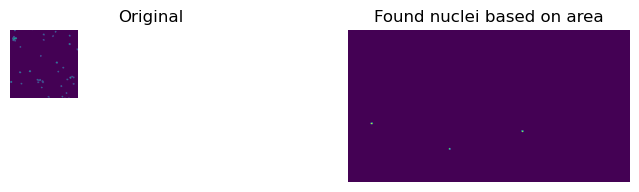

In [51]:
min_area = 10 
max_area = 150


# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
	# Find the areas that do not fit our criteria
	if region.area > max_area or region.area < min_area:
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0  # pone true si son mayors de 0 es decir 0 back lo demas true
show_comparison(img_small, i_area, 'Found nuclei based on area')

### Exercise 12  Extract all the perimeters of the BLOBS:

plot de las areas y sus perimetros, vemos que hay una relacion 1 a 1 directa positiva

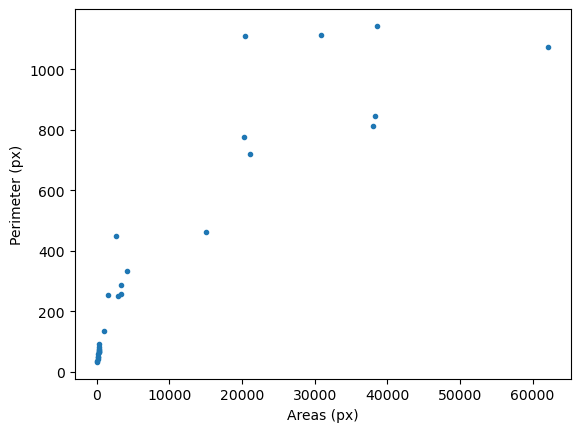

In [53]:
perimeters = np.array([prop.perimeter for prop in region_props]) # sacar el perimetro

fig, ax = plt.subplots(1,1)

ax.plot(areas, perimeters, '.')
ax.set_xlabel('Areas (px)')
ax.set_ylabel('Perimeter (px)')
plt.show()

### Exercise 13: BLOB Circularity 
We should also examine if the shape of the cells can identify them

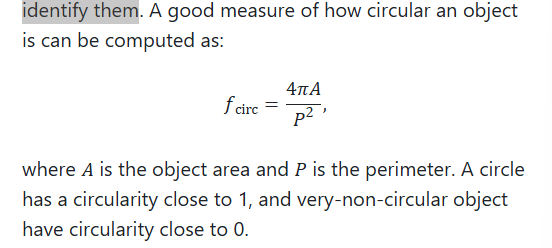



Compute the circularity for all objects and plot a histogram.

In [57]:
def circularity(area, perimeter):
    '''
    You may get values larger than 1 because
    we are in a "discrete" (pixels) domain. Check:

    CIRCULARITY OF OBJECTS IN IMAGES, Botterma, M.J. (2000)
    https://core.ac.uk/download/pdf/14946814.pdf
    '''
    f_circ = (4*np.pi*area)/(perimeter**2)
    return f_circ

circs = circularity(areas, perimeters)
print(areas)

[21111. 38369. 38053.   275.  1036.   262.   338.   377.  2953.  3330.
   298.  4195.  3387. 38515. 30914. 20229. 62155. 15086.  1604.   166.
    81.   143.   373. 20370.   135.  2613.   100.   321.   229.]


Compute the circularity for all objects and plot a histogram.

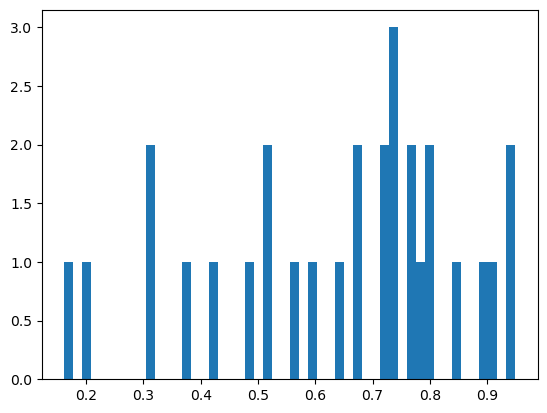

In [58]:
plt.hist(circs, bins=50)
plt.show()

- Cuanto mas cerca de 1 , mas redondo
- Cuanto mas cerca de 0 , menos redondo

Select some appropriate ranges of accepted circularity. Use these ranges to select only the cells with acceptable areas and circularity and show them in an image.

Progrmaa que discrimina por area y por valores que no parecen redondos

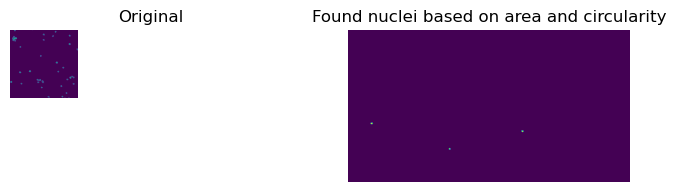

In [ ]:
min_circ = 0.7
min_area = 10 
max_area = 150

# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
	circ = circularity(region.area, region.perimeter)
	# Find the areas that do not fit our criteria
	if region.area > max_area or region.area < min_area or circ < min_circ:
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_filter[cords[0], cords[1]] = 0

# Create binary image from the filtered label image
i_area = label_img_filter > 0
show_comparison(img_small, i_area, 'Found nuclei based on area and circularity')

#plot mal

### Exercise 14: BLOB circularity and area


Try to plot the areas versus the circularity. What do you observe?

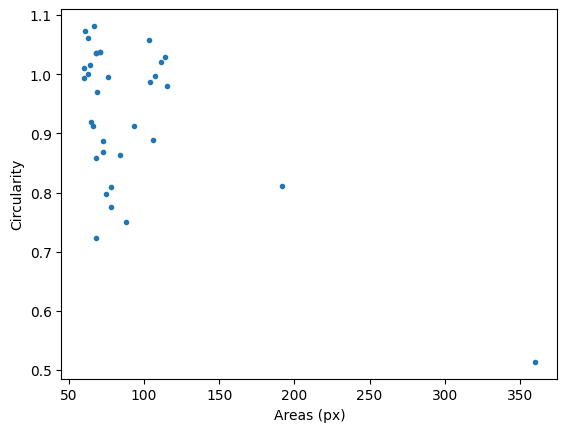

In [23]:
fig, ax = plt.subplots(1,1)
ax.plot(areas, circs, '.')
ax.set_xlabel('Areas (px)')
ax.set_ylabel('Circularity')
plt.show()

## RESUMEN DE TODO EL CAPITULO EN UNA FUNCION


In [61]:
def cell_counting(img_gray, min_area = 10, max_area = 150, min_circ = 0.7):

    # Binarization
    thres = threshold_otsu(img_gray)
    img_bin = img_gray > thres
    # le quitas los bordes
    img_c_b = segmentation.clear_border(img_bin)

    # Label image
    label_img = measure.label(img_c_b)

    # Extract properties
    region_props = measure.regionprops(label_img)

    # Number of blobs
    n_nuclei = len(region_props)
    
    # Filter the label image
    label_img_filter = label_img.copy()
    for region in region_props:
        circ = circularity(region.area, region.perimeter)
        # Find the areas that do not fit our criteria
        if region.area > max_area or region.area < min_area or circ < min_circ:
            # set the pixels in the invalid areas to background
            n_nuclei = n_nuclei - 1
            for cords in region.coords:
                label_img_filter[cords[0], cords[1]] = 0

    # Create binary image from the filtered label image
    i_area = label_img_filter > 0

    return i_area, n_nuclei

### Exercise 15: large scale testing

Try to test the method on a larger set of training images. Use slicing to select the different regions from the raw image.


In [62]:
def im2patch(im, patch_size=[256,256]):
    """
    Fancy function to rearrange an image into patches (Not important).
    
    Arguments:
        image: a 2D image, shape (r,c).
        patch size: size of extracted paches.
    Returns:
        patches: a 3D array which in every 3rd dimension has a patch associated 
    """
    
    r,c = im.shape
    s0, s1 = im.strides    
    nrows =r-patch_size[0]+1
    ncols = c-patch_size[1]+1
    shp = patch_size[0],patch_size[1],nrows,ncols
    strd = s0,s1,s0,s1

    out_view = np.lib.stride_tricks.as_strided(im, shape=shp, strides=strd)
    out_view = out_view[:,:,::patch_size[0],::patch_size[1]].reshape(patch_size[0],patch_size[1],-1)
    return out_view

In [63]:
in_dir = "data/"
img_org = io.imread(in_dir + 'Sample E2 - U2OS DAPI channel.tiff')
img_gray = img_as_ubyte(img_org)

Number of patches 24


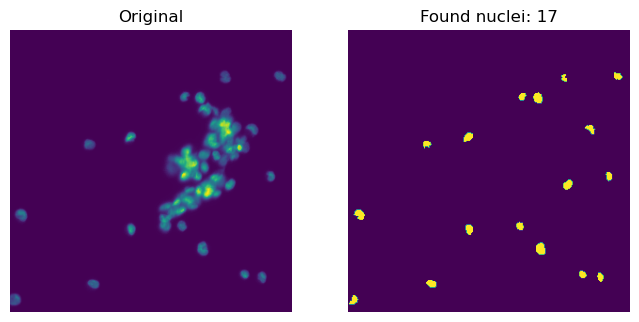

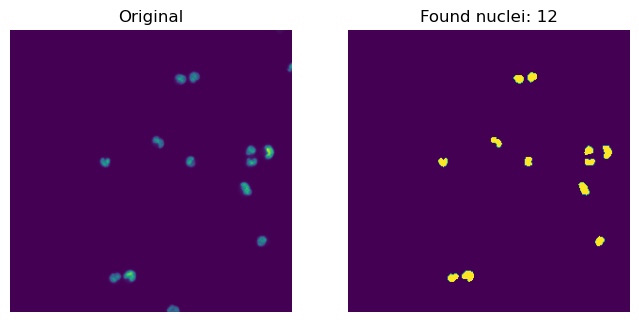

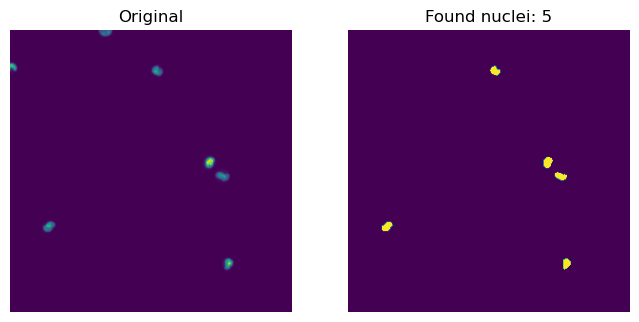

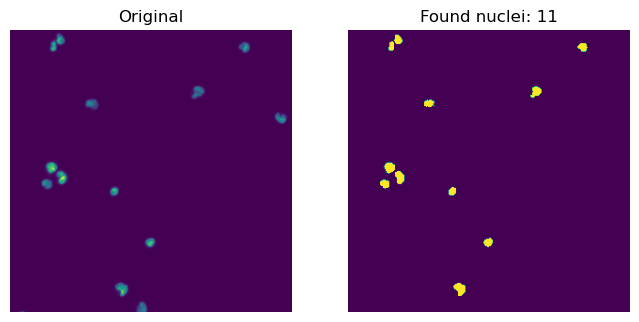

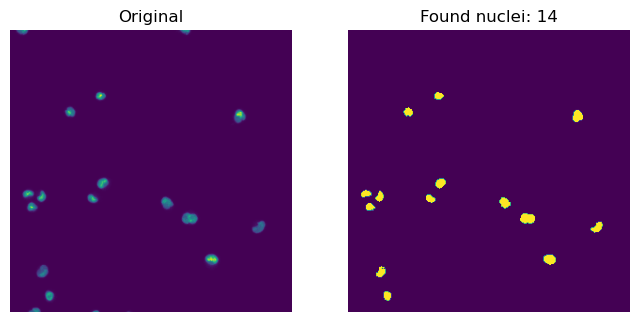

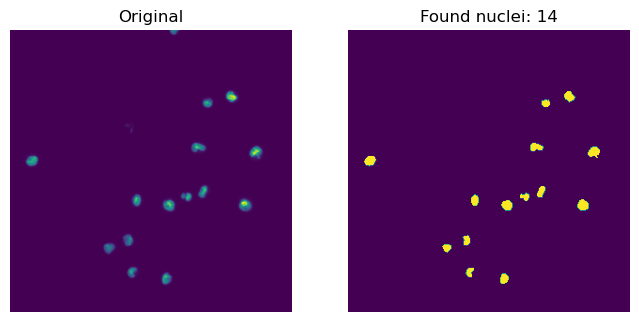

In [64]:
patches = im2patch(img_gray, patch_size=[300,300])
print(f'Number of patches {patches.shape[-1]}')

for idx_patch in range(6):
    patch = patches[:,:,idx_patch]
    filt_label, n_nuclei = cell_counting(patch)
    show_comparison(patch, filt_label, f'Found nuclei: {n_nuclei}')

### Exercise 16 COS7 cell classification

Number of patches 24


C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_23852\3870590976.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  f_circ = (4*np.pi*area)/(perimeter**2)


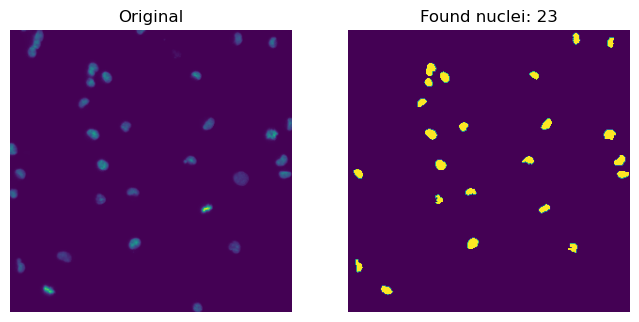

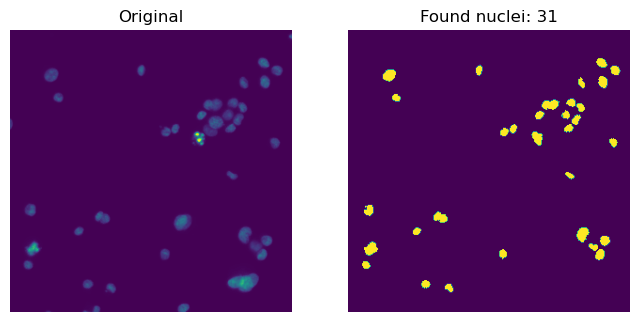

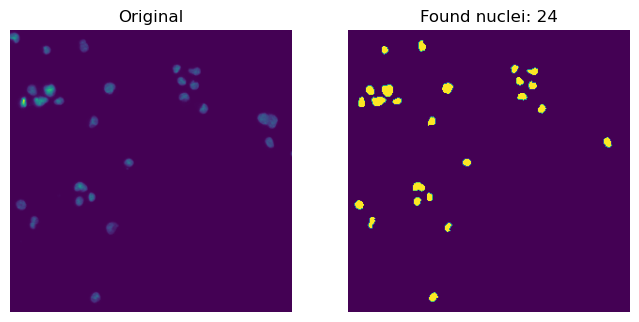

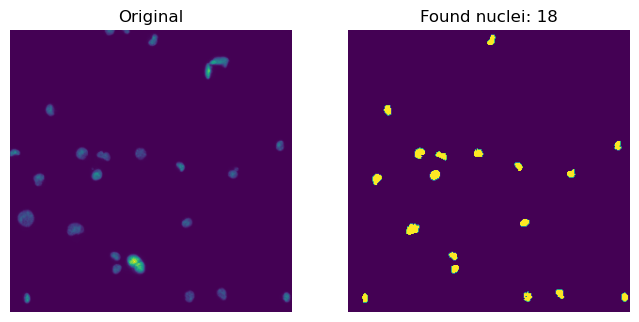

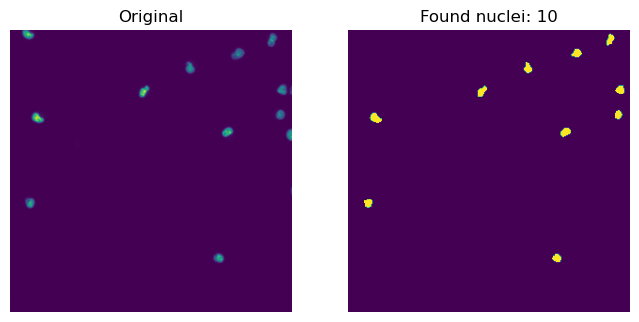

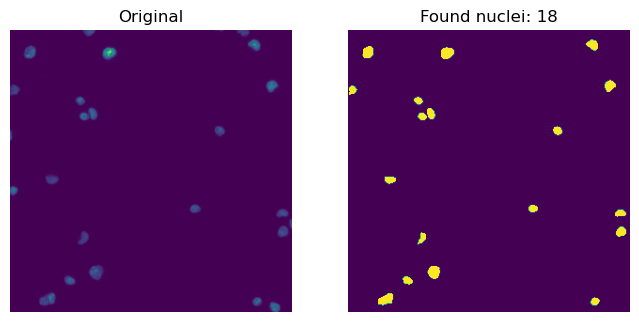

In [65]:
img_org = io.imread(in_dir + 'Sample G1 - COS7 cells DAPI channel.tiff')
img_gray = img_as_ubyte(img_org)

patches = im2patch(img_gray, patch_size=[300,300])
print(f'Number of patches {patches.shape[-1]}')

for idx_patch in range(6):
    patch = patches[:,:,idx_patch]
    filt_label, n_nuclei = cell_counting(patch)
    show_comparison(patch, filt_label,  f'Found nuclei: {n_nuclei}')

### Exercise 17 Handling overlap

 It can sometimes be solved using for example the morphological operation opening before the object labelling. The operation erosion can also be used but it changes the object area.

In [ ]:
def cell_counting_ex17(img_gray, opening_sz = 5, min_area = 10, max_area = 150, min_circ = 0.7):

    # Binarization
    thres = threshold_otsu(img_gray)
    img_bin = img_gray > thres
    img_c_b = segmentation.clear_border(img_bin)

    #lo nuevo, se le añade un opening
    img_open = morphology.binary_opening(img_c_b, morphology.disk(opening_sz))

    # Label image
    label_img = measure.label(img_open)

    # Extract properties
    region_props = measure.regionprops(label_img)
    
    # Number of blobs
    n_nuclei = len(region_props)
    
    # Filter the label image
    label_img_filter = label_img.copy()
    for region in region_props:
        circ = circularity(region.area, region.perimeter)
        # Find the areas that do not fit our criteria
        if region.area > max_area or region.area < min_area or circ < min_circ:
            n_nuclei = n_nuclei - 1
            # set the pixels in the invalid areas to background
            for cords in region.coords:
                label_img_filter[cords[0], cords[1]] = 0

    # Create binary image from the filtered label image
    i_area = label_img_filter > 0

    return i_area, n_nuclei

Number of patches 24


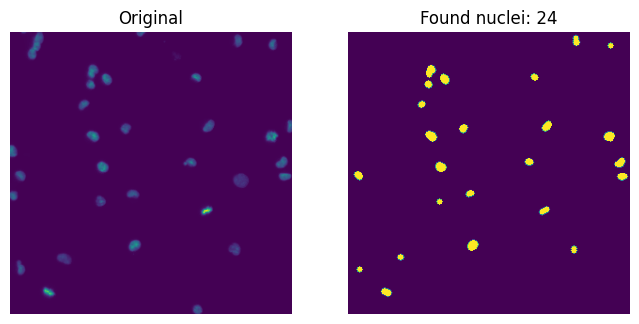

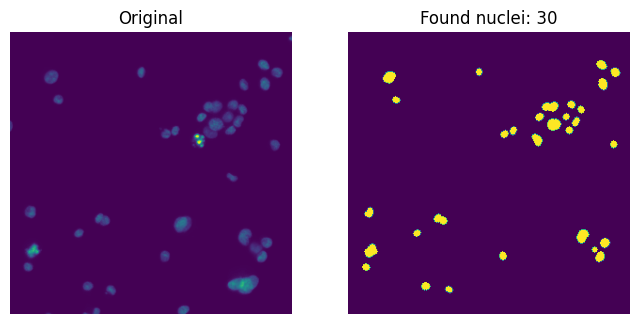

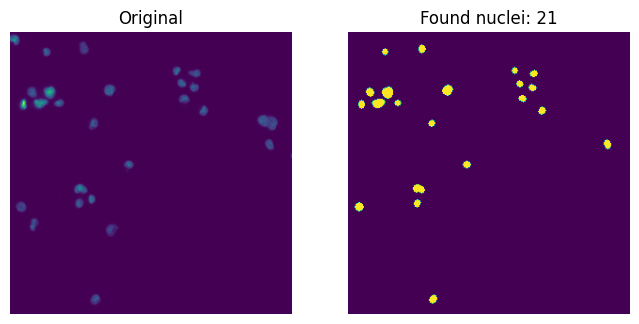

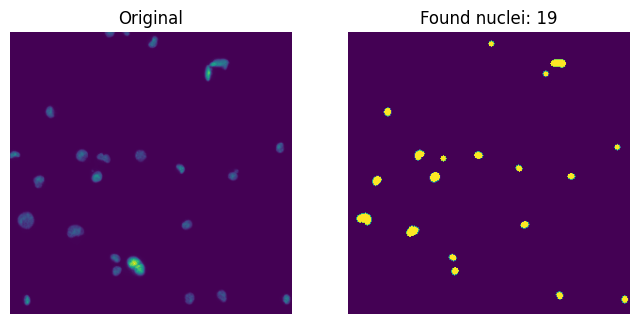

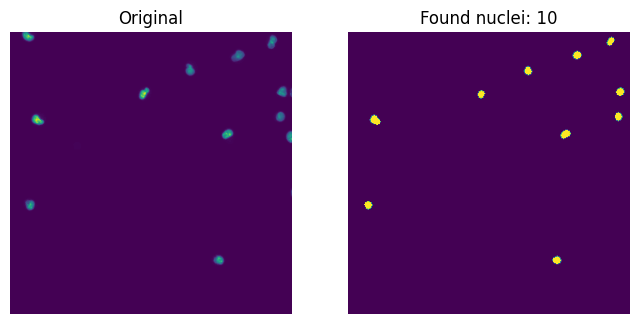

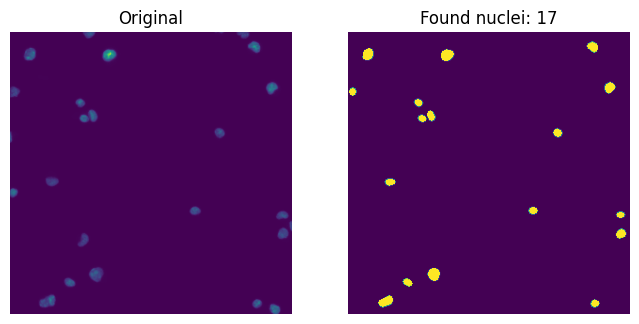

In [30]:
img_org = io.imread(in_dir + 'Sample G1 - COS7 cells DAPI channel.tiff')
img_gray = img_as_ubyte(img_org)

patches = im2patch(img_gray, patch_size=[300,300])
print(f'Number of patches {patches.shape[-1]}')

for idx_patch in range(6):
    patch = patches[:,:,idx_patch]
    filt_label, n_nuclei = cell_counting_ex17(patch, opening_sz = 3)
    show_comparison(patch, filt_label, f'Found nuclei: {n_nuclei}')